In [1]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent.parent)+'/lund-university-code')
sys.path.append(str(Path.cwd().parent.parent)+'/lund-university-code/TimeSeriesAnalysis')
sys.path.append(str(Path.cwd().parent.parent)+'/lund-university-code/TimeSeriesAnalysis/')

In [2]:
import pandas as pd
import TimeSeriesAnalysis.tsa_lth.analysis as analysis
import TimeSeriesAnalysis.tsa_lth.modelling as modelling
import TimeSeriesAnalysis.tsa_lth.tests as tests
from TimeSeriesAnalysis.tsa_lth.tools import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import pylab

In [3]:
def getARMA(data, A=0, C=0):
    A_free=A
    C_free=C
    model = modelling.PEM(data, A=A, C=C)
    if isinstance(A, int):
        A_free = [1]*(A+1)
    if isinstance(C, int):
        C_free = [1]*(C+1)
        print(C_free)
    model.set_free_params(A_free=A_free, C_free=C_free)
    model_fitted = model.fit(method='LS', bh=False)
    model_fitted.summary()
    return model_fitted

def checkNormal(data, remove=False, title=None):
    if remove:
        data = data[remove:]
    tests.check_if_normal(data)
    stats.probplot(data, dist="norm", plot=pylab)
    # variable = [ i for i, j in locals().items() if j == data][0]
    if title:
        plt.title(title)
    pylab.show()
    
    
def analyzeARMA(x, A=0, C=0, noLags=50, titleStr=None, return_val=False, normal_test=True):
    model = getARMA(x, A=A, C=C)
    if isinstance(A, int): len_A = A
    else: len_A = len(A)
    if isinstance(C, int): len_C = C
    else: len_C = len(C)
    remove=max(len_A, len_C)
    res = model.resid
    acf_est, pacf_est = analysis.plotACFnPACF(res,noLags=noLags,titleStr=titleStr, return_val=True)
    tests.whiteness_test(res)
    if normal_test:
        checkNormal(acf_est, remove=remove, title='ACF')
        checkNormal(pacf_est, remove=remove, title='PACF')
    if return_val:
        return model, acf_est, pacf_est

In [4]:
# Define parameters for simulation
random.seed(0)
n = 500
A3 = [1, .5]
C3 = [1, -.3, .2]
w = np.sqrt(2) * np.random.randn(n+100)
x = modelling.filter(C3,A3,w)
A1 = [1, -.65]
A2 = [1, .90, .78] 
C = 1 
B = [0, 0, 0, 0, .4]
e = np.sqrt( 1.5 ) * np.random.randn( n + 100) ;
y = np.add(modelling.filter(C, A1, e), modelling.filter(B, A2, x)) ;
x = x[100:]
y = y[100:]

# Question 1

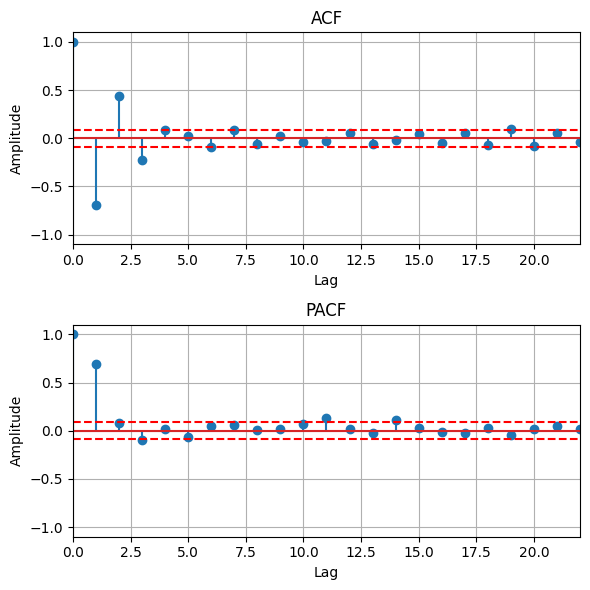

In [5]:
# Observe the ACF and PACF of x
analysis.plotACFnPACF(x)

[1]
Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 + 0.6933(±0.0323)·z⁻¹

Polynomial orders: nA = 1
Number of free coefficients: 1
Fit to estimation data (NRMSE): 27.86%
FPE : 2.22  MSE : 2.211
AIC : 1814.053   BIC : 1818.265



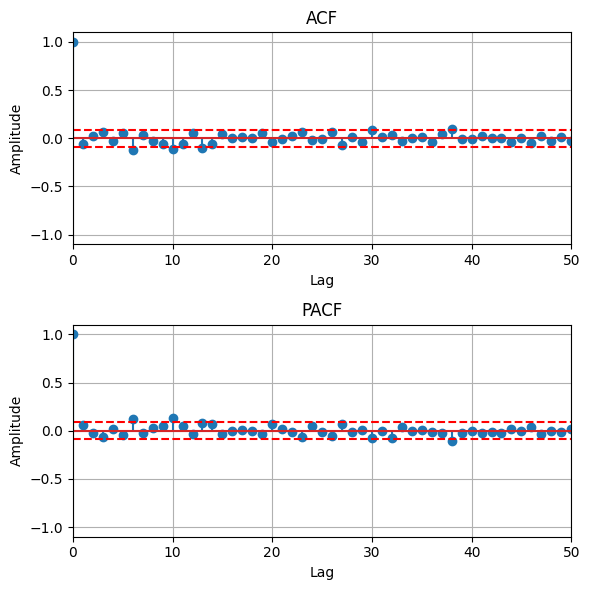

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 36.53 < 31.41)
  McLeod-Li test:        True (white if 16.29 < 31.41)
  Monti test:            False (white if 35.09 < 31.41)
  Sign change test:      True (white if 0.52 in [0.46,0.54])


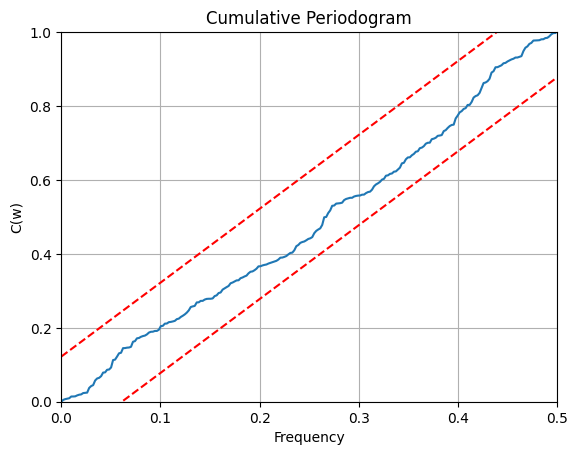

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


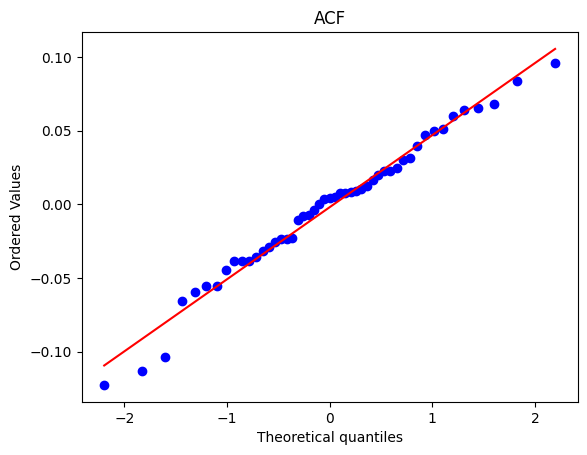

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


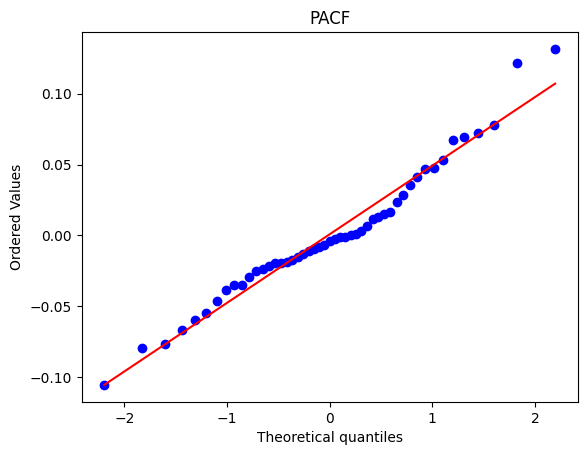

In [6]:
# Here an AR(1) seems to be a reasonable first choice based on the PACF.
A3 = [1,1]
analyzeARMA(x,A3)

Discrete-time ARMA model: A(z)y(t) = C(z)e(t)

A(z) = 1.0 + 0.5387(±0.0818)·z⁻¹
C(z) = 1.0 - 0.2071(±0.0888)·z⁻¹ + 0.1282(±0.0673)·z⁻²

Polynomial orders: nA = 1    nC = 2
Number of free coefficients: 3
Fit to estimation data (NRMSE): 28.35%
FPE : 2.207  MSE : 2.181
AIC : 1811.246   BIC : 1823.884



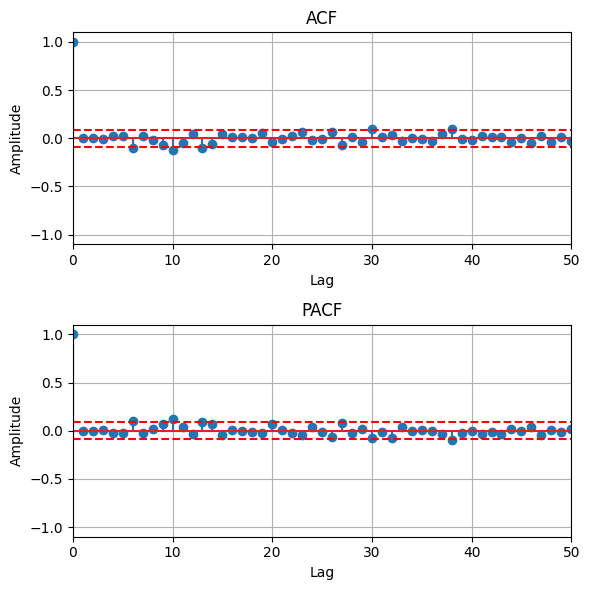

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 29.07 < 31.41)
  McLeod-Li test:        True (white if 15.00 < 31.41)
  Monti test:            True (white if 28.62 < 31.41)
  Sign change test:      True (white if 0.51 in [0.46,0.54])


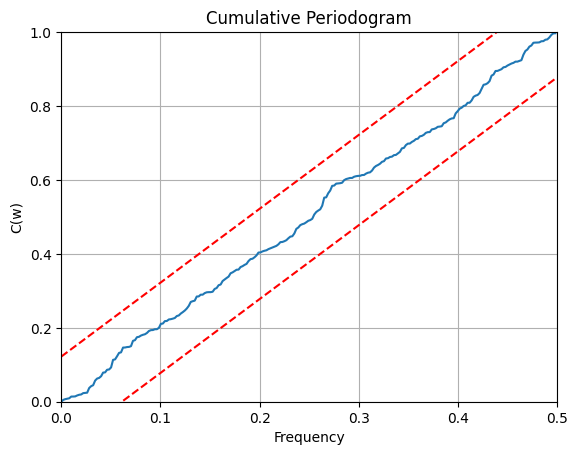

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


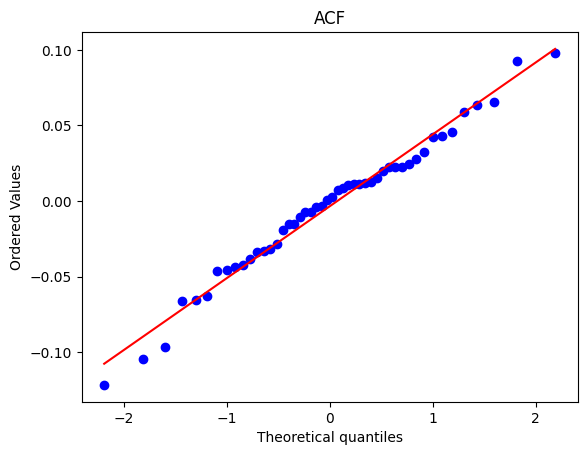

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


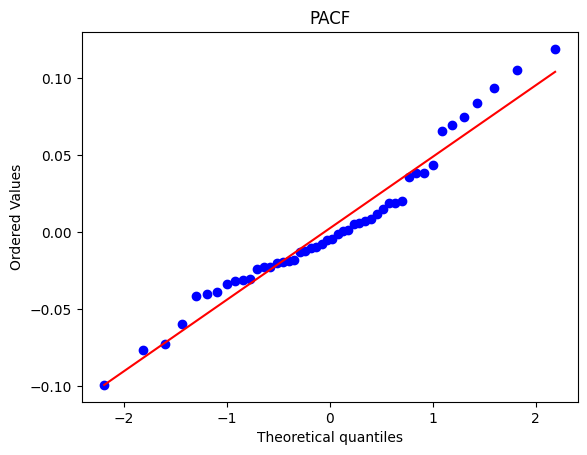

In [7]:
# Check for ARMA(1,2)

A3 = [1,1]
C3 = [1,1,1]
model_x, acf, pacf = analyzeARMA(x,A=A3,C=C3, return_val=True)

# Question 2

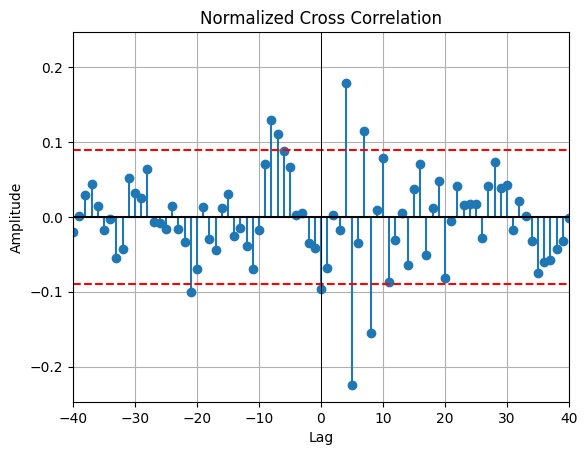

In [8]:
# Pre-whiten y_t
est_A3 = model_x.A
est_C3 = model_x.C
w_t = model_x.resid
M=40
eps_t = modelling.filter(est_A3, est_C3,y, remove=1)
corr = analysis.ccf(w_t, eps_t, numLags=M, plotIt=False)
analysis.ccf(w_t, eps_t, numLags=M)

Here, d=4, r=2, s=0 is a reasonable choice.

Discrete-time BJ model: y(t) = [B(z)/F(z)]x(t) + e(t)

B(z) = 0.3944(±0.0222)·z⁻⁴
F(z) = 1.0 + 0.909(±0.0182)·z⁻¹ + 0.7938(±0.0181)·z⁻²

Polynomial orders: nB = 4    nF = 2
Number of free coefficients: 3
Fit to estimation data (NRMSE): 28.89%
FPE : 2.493  MSE : 2.467
AIC : 1861.572   BIC : 1874.192



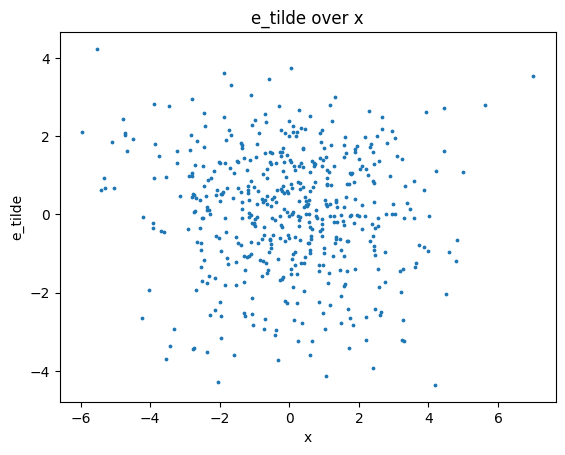

In [9]:
# Estimate 

A2 = 2
B = [0]*4 + [1] # Not sure about this
d = 4
model_x = modelling.PEM( y=y,x=x,A=0,B=B,F=A2)
model_x.set_free_params(B_free=B)
model_fitted_x = model_x.fit(method='LS', bh=False)
model_fitted_x.summary()
e_tilde = model_fitted_x.resid
plt.scatter(x[4:], e_tilde, s=3)
plt.title('e_tilde over x')
plt.xlabel('x')
plt.ylabel('e_tilde')
plt.show()

Here it can be seen that x is uncorrelated to e_tilde as the scatter plot above shows no relationship between them. \
We also expect that e_tilde is not a white noise as we included an A1 parameter.

# Question 3

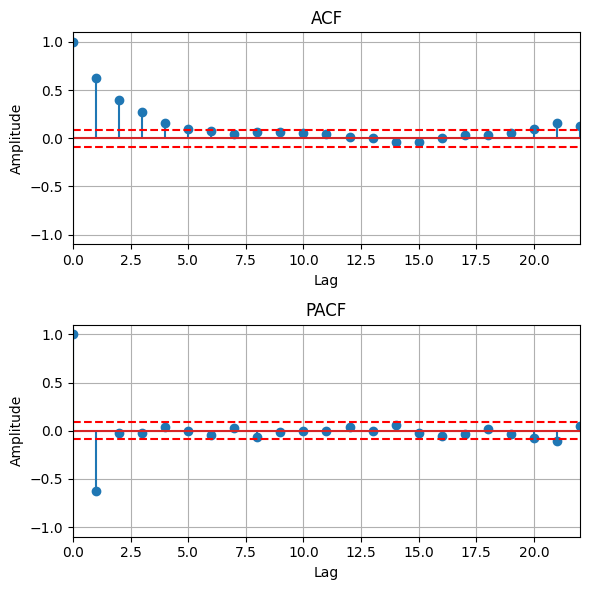

In [10]:
# Check ARMA parameters for e_tilde
analysis.plotACFnPACF(e_tilde)

[1]
Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 0.6235(±0.0349)·z⁻¹

Polynomial orders: nA = 1
Number of free coefficients: 1
Fit to estimation data (NRMSE): 22.19%
FPE : 1.497  MSE : 1.491
AIC : 1604.545   BIC : 1608.749



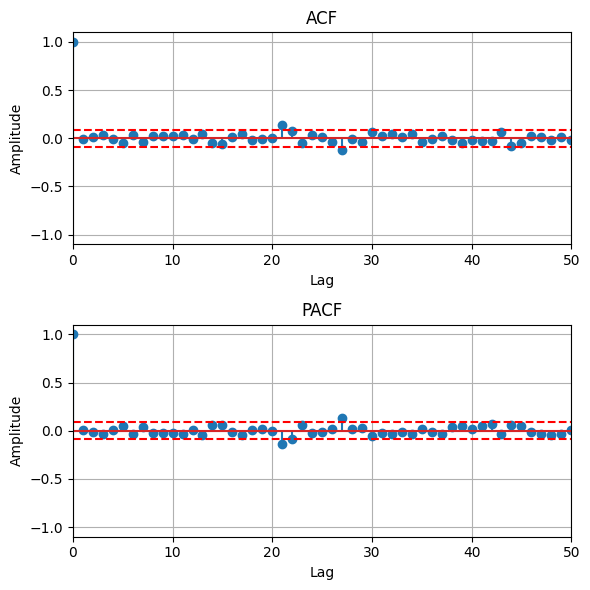

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 9.51 < 31.41)
  McLeod-Li test:        True (white if 20.91 < 31.41)
  Monti test:            True (white if 9.97 < 31.41)
  Sign change test:      True (white if 0.52 in [0.46,0.54])


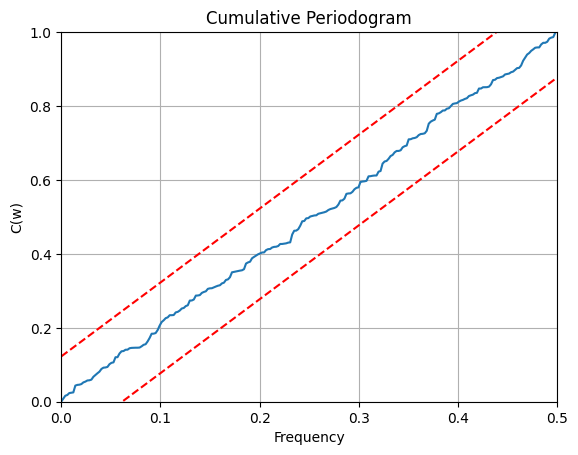

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


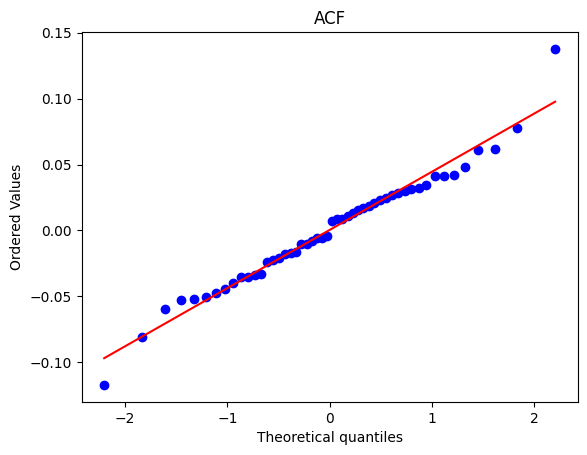

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


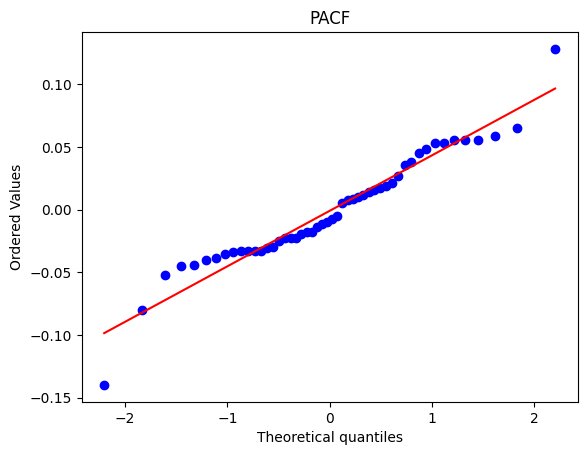

In [11]:
# It seems like AR(1) is a reasonable choice.
A1 = 1
analyzeARMA(e_tilde, A=A1)

Here, we can say that AR(1) is a good model for e_tilde \
**Q**: Was all dependence from x removed in e_tilde? \
**A**: The scatter plot of x to e_tilde shows that e_tilde is uncorrelated to x

Discrete-time BJ model: y(t) = [B(z)/F(z)]x(t) + [1/D(z)]e(t)

B(z) = 0.3948(±0.0116)·z⁻⁴
D(z) = 1.0 - 0.6245(±0.0351)·z⁻¹
F(z) = 1.0 + 0.9093(±0.01)·z⁻¹ + 0.7937(±0.0097)·z⁻²

Polynomial orders: nB = 4    nD = 1    nF = 2
Number of free coefficients: 4
Fit to estimation data (NRMSE): 44.43%
FPE : 1.531  MSE : 1.507
AIC : 1619.055   BIC : 1635.881



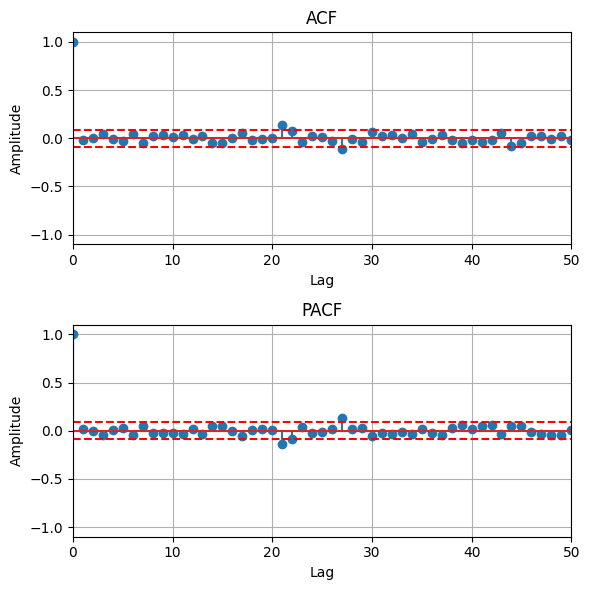

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 9.44 < 31.41)
  McLeod-Li test:        True (white if 23.51 < 31.41)
  Monti test:            True (white if 9.79 < 31.41)
  Sign change test:      True (white if 0.52 in [0.46,0.54])


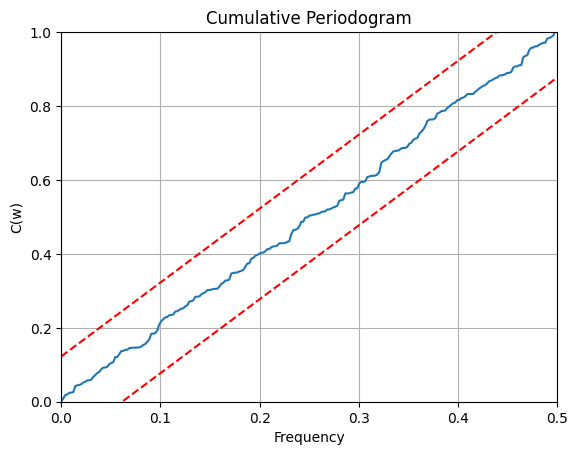

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


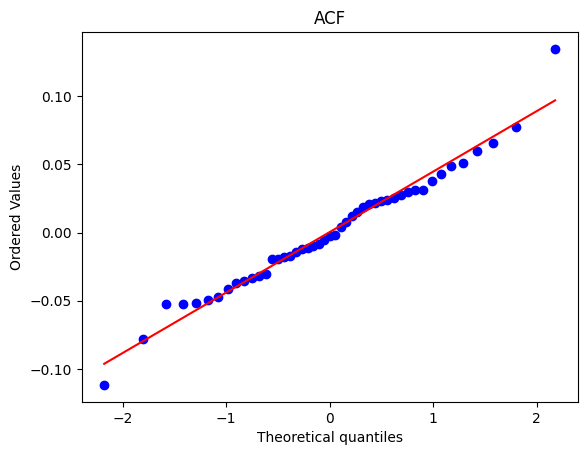

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


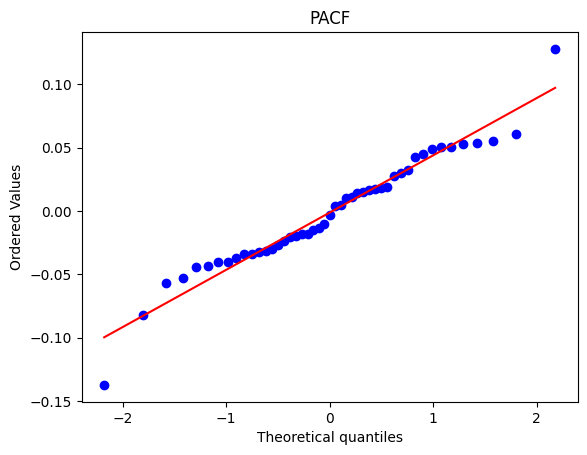

In [12]:
# Use PEM to re-estimate all parameters with the orders found
A1 = 1
A2 = 2
B = [0]*4 + [1]
C = 0
final_model = modelling.PEM( y=y,x=x,A=0,B=B,F=A2, C=C, D=A1)
final_model.set_free_params(B_free=B)
final_model_fitted = final_model.fit(method='LS', bh=False)
final_model_fitted.summary()
final_resid = final_model_fitted.resid
final_acf_est, final_pacf_est = analysis.plotACFnPACF(final_resid,noLags=50,titleStr=None, return_val=True)
tests.whiteness_test(final_resid)
checkNormal(final_acf_est, remove=4, title='ACF')
checkNormal(final_pacf_est, remove=4, title='PACF')

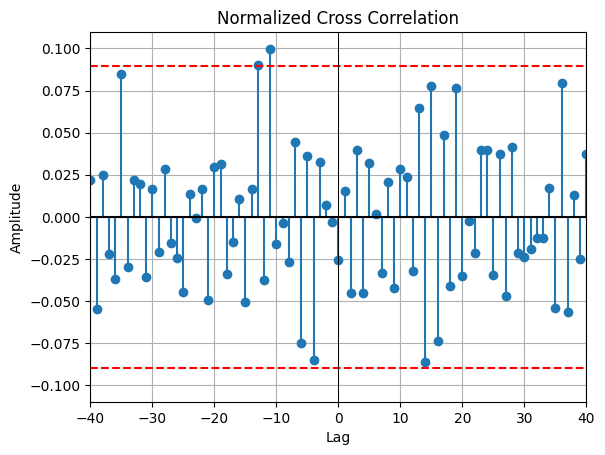

In [13]:
final_corr = analysis.ccf(x, final_resid, numLags=M, plotIt=False)
analysis.ccf(x, final_resid, numLags=M)

From the ACF and PACF of the residuals we see that it is reasonably white. The CCF of x and e also shows that there are no correlation between x and e. Hence, we can conclude that the residual is uncorrelated with the input signal.

# Question 4

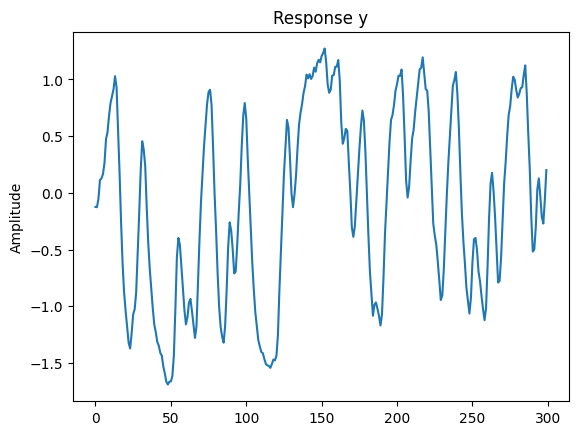

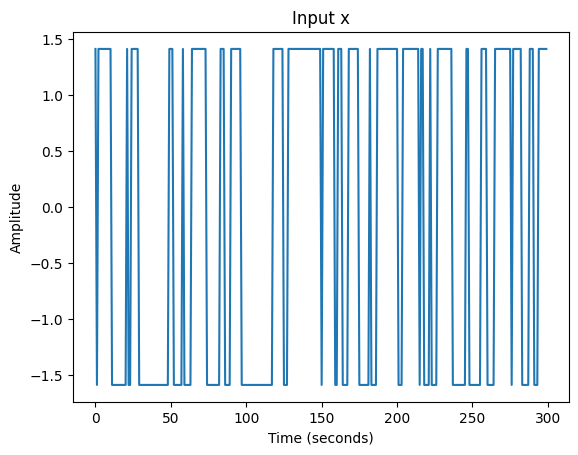

In [14]:
tork = pd.read_csv('./data/tork.dat', header=None)
tork[0] = tork[0].apply(lambda x: x.strip())
tork[[0,1]] = tork[0].str.split('  ',expand=True)
tork[0] = tork[0].apply(lambda x: float(x)) 
tork[1] = tork[1].apply(lambda x: float(x))
tork = tork - tork.mean()
tork_y = tork[0].values.tolist()
tork_x = tork[1].values.tolist()
plt.plot(tork_y[:300])
plt.title('Response y')
plt.ylabel('Amplitude')
plt.show()
plt.plot(tork_x[:300])
plt.title('Input x')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.show()

## Modeling ARMA for input X

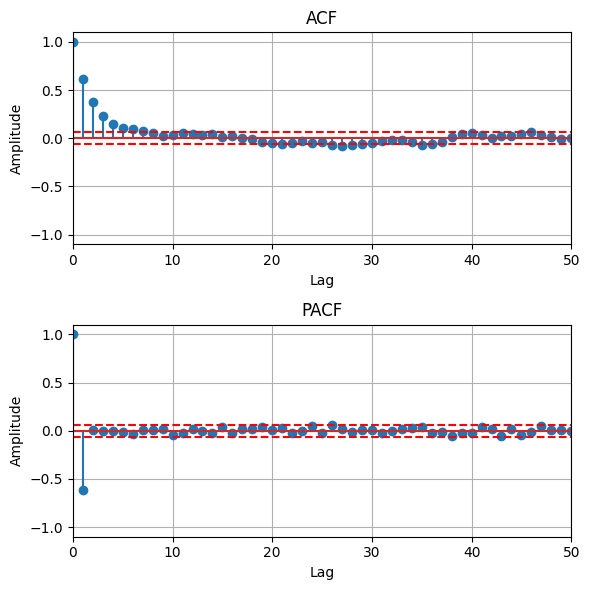

In [15]:
analysis.plotACFnPACF(tork_x,noLags=50,titleStr=None)

[1]
Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 0.6183(±0.0249)·z⁻¹

Polynomial orders: nA = 1
Number of free coefficients: 1
Fit to estimation data (NRMSE): 21.4%
FPE : 1.388  MSE : 1.385
AIC : 3162.429   BIC : 3167.336



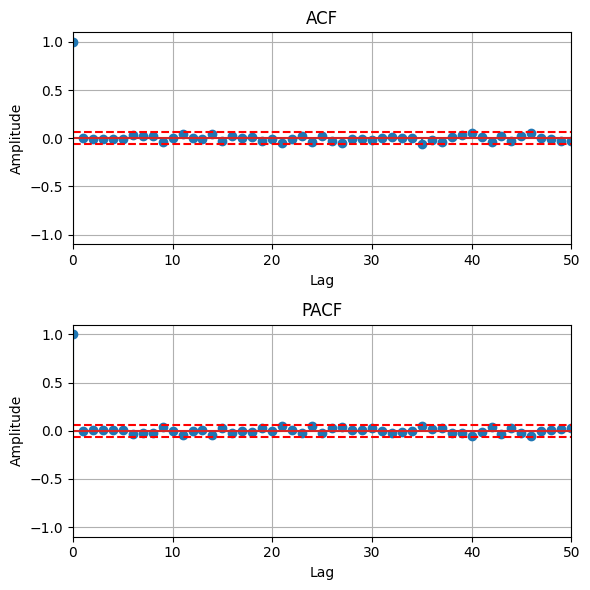

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 9.41 < 31.41)
  McLeod-Li test:        True (white if 12.28 < 31.41)
  Monti test:            True (white if 9.26 < 31.41)
  Sign change test:      False (white if 0.19 in [0.47,0.53])


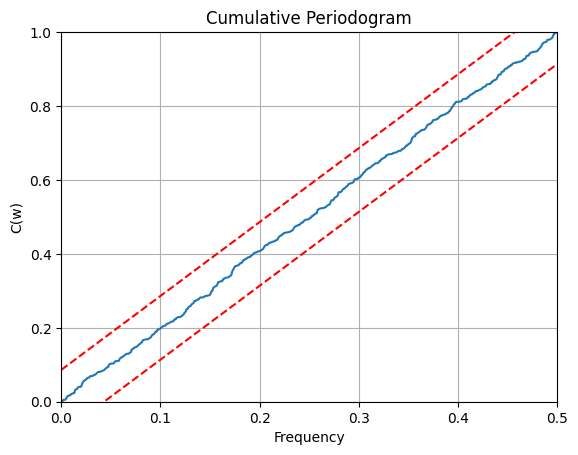

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


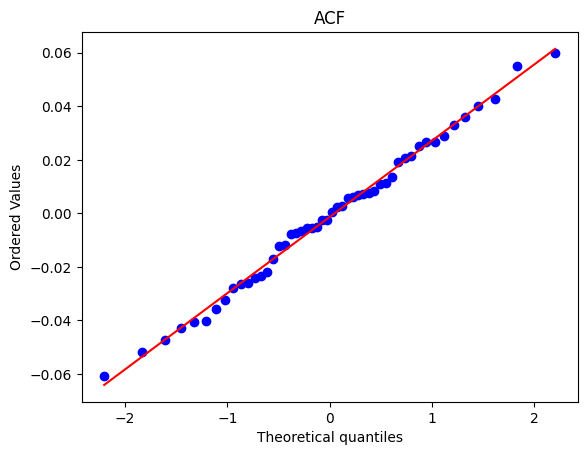

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


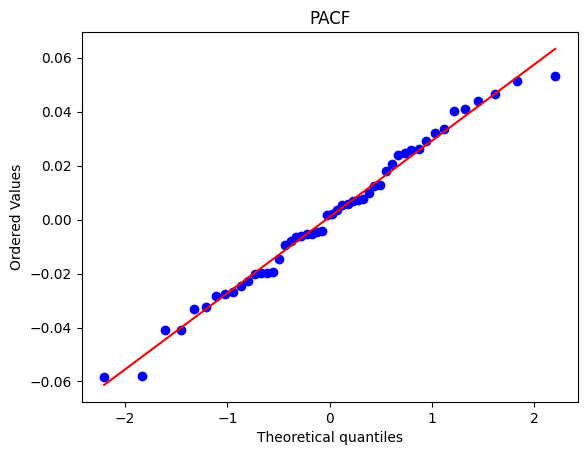

In [16]:
# We try AR(1)
tork_A3 = 1
# tork_x_model = getARMA(tork_x, A=tork_A3)
tork_x_model, tork_x_acf, tork_x_pacf = analyzeARMA(tork_x, A=tork_A3, return_val=True)

AR(1) seems to be a reasonable model.

## Pre-Whiten and plot CCF of eps to w

In [17]:
tork_x_model.A

array([ 1.        , -0.61828856])

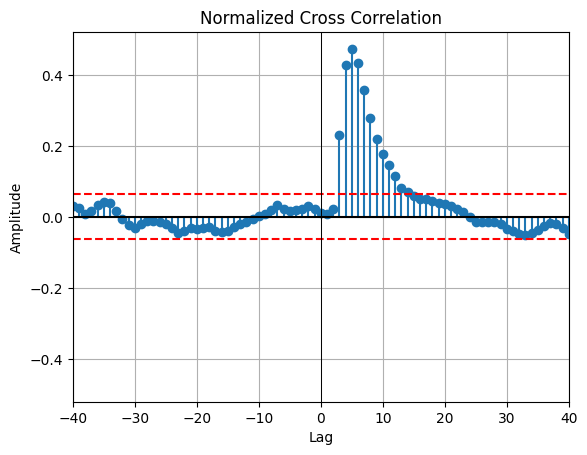

In [18]:
# Pre-whiten y_t
tork_est_A3 = tork_x_model.A
tork_est_C3 = [1]
tork_w_t = tork_x_model.resid
M=40
tork_eps_t = modelling.filter(B=tork_est_A3, A=tork_est_C3, X=tork_y, remove=True)
corr = analysis.ccf(tork_w_t, tork_eps_t, numLags=M, plotIt=False)
analysis.ccf(tork_w_t, tork_eps_t, numLags=M)

In [19]:
# A reasonable option here would be d=3, r=1, s=2
d = 3
r = 1
s = 2
tork_A2 = r
tork_B = [0]*d + [1]*s # Not sure about this

tork_model_x = modelling.PEM( y=tork_y,x=tork_x,A=0,B=tork_B,F=tork_A2)
tork_model_x.set_free_params(B_free=tork_B)
tork_model_fitted_x = tork_model_x.fit(method='LS', bh=False)
tork_model_fitted_x.summary()
tork_e_tilde = tork_model_fitted_x.resid
# plt.scatter(tork_x[4:], tork_e_tilde, s=3)
# plt.title('e_tilde over x')
# plt.xlabel('x')
# plt.ylabel('e_tilde')
# plt.show()

Discrete-time BJ model: y(t) = [B(z)/F(z)]x(t) + e(t)

B(z) = 0.0471(±0.003)·z⁻³ + 0.139(±0.0035)·z⁻⁴
F(z) = 1.0 - 0.808(±0.0019)·z⁻¹

Polynomial orders: nB = 4    nF = 1
Number of free coefficients: 3
Fit to estimation data (NRMSE): 85.28%
FPE : 0.015  MSE : 0.015
AIC : -1356.828   BIC : -1342.116



## Modeling for e_tilde

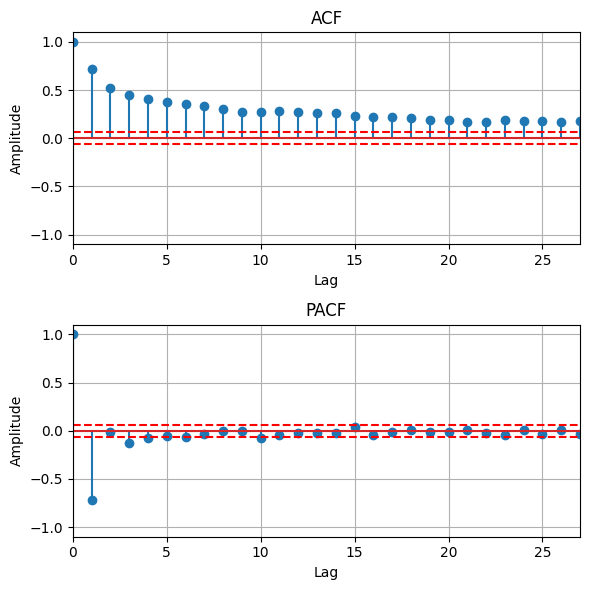

In [20]:
analysis.plotACFnPACF(tork_e_tilde)

[1]
Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 - 0.7215(±0.022)·z⁻¹

Polynomial orders: nA = 1
Number of free coefficients: 1
Fit to estimation data (NRMSE): 30.65%
FPE : 0.007  MSE : 0.007
AIC : -2089.435   BIC : -2084.532



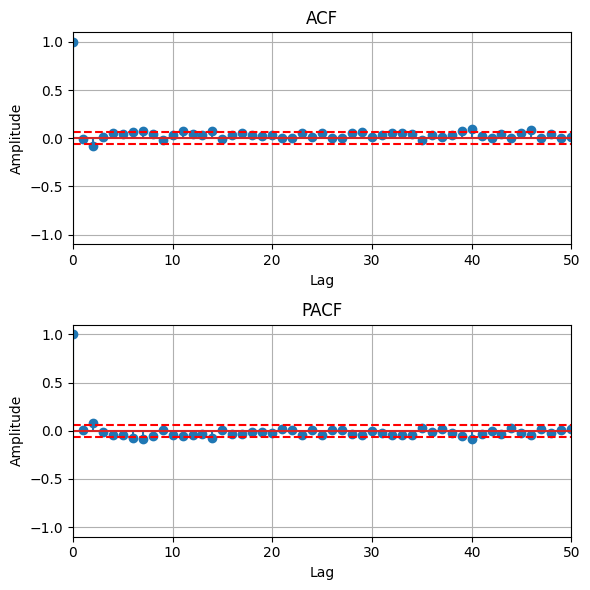

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: False (white if 47.27 < 31.41)
  McLeod-Li test:        True (white if 19.63 < 31.41)
  Monti test:            False (white if 43.75 < 31.41)
  Sign change test:      False (white if 0.45 in [0.47,0.53])


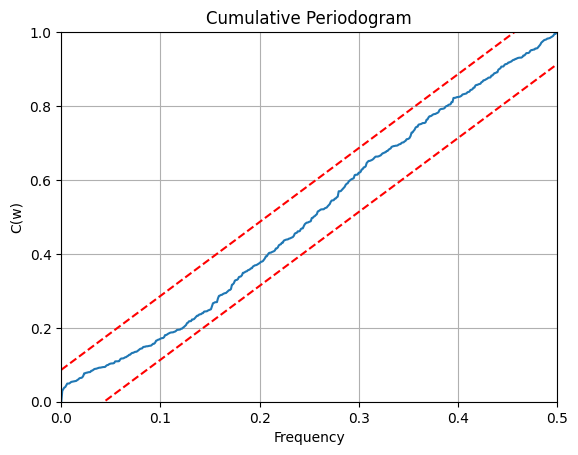

In [21]:
# AR(1) seems reasonable
tork_y_model, tork_y_acf, tork_y_pacf = analyzeARMA(tork_e_tilde, A=1, return_val=True, normal_test=False)

[1, 1, 1]
Discrete-time ARMA model: A(z)y(t) = C(z)e(t)

A(z) = 1.0 - 0.9015(±0.0227)·z⁻¹
C(z) = 1.0 - 0.2329(±0.0403)·z⁻¹ - 0.2446(±0.0375)·z⁻²

Polynomial orders: nA = 1    nC = 2
Number of free coefficients: 3
Fit to estimation data (NRMSE): 31.56%
FPE : 0.007  MSE : 0.007
AIC : -2111.787   BIC : -2097.079



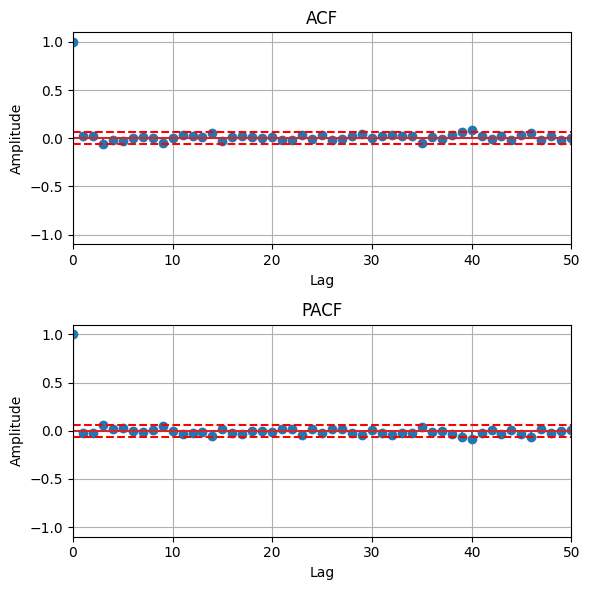

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 15.74 < 31.41)
  McLeod-Li test:        True (white if 21.29 < 31.41)
  Monti test:            True (white if 16.13 < 31.41)
  Sign change test:      False (white if 0.44 in [0.47,0.53])


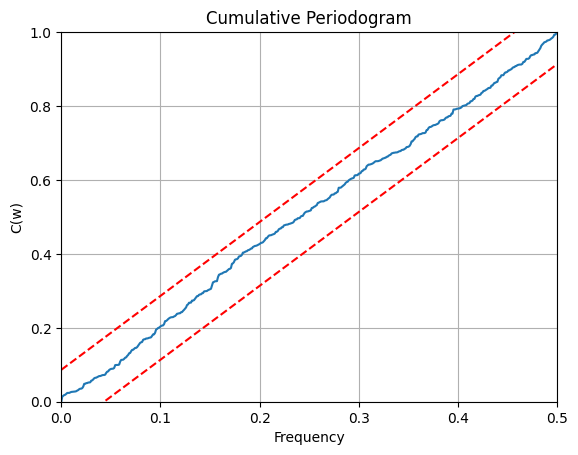

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


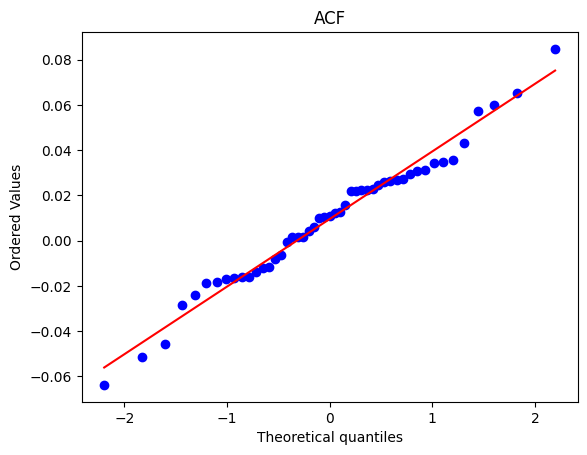

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


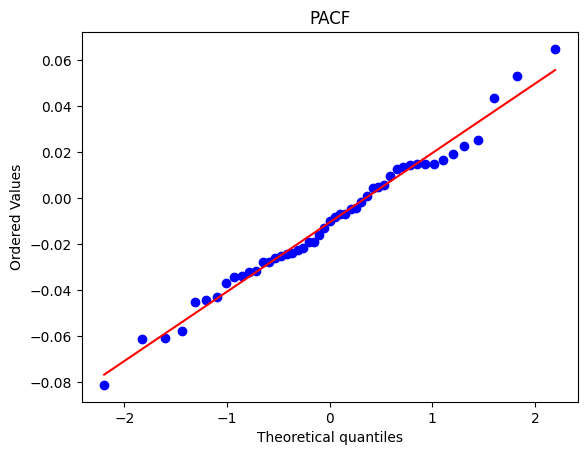

In [22]:
# Not white yet, lets add MA(2) parameters
tork_y_model, tork_y_acf, tork_y_pacf = analyzeARMA(tork_e_tilde, A=1, C=2,return_val=True)

Looks pretty good

Discrete-time BJ model: y(t) = [B(z)/F(z)]x(t) + [1/D(z)]e(t)

B(z) = 0.3948(±0.0116)·z⁻⁴
D(z) = 1.0 - 0.6245(±0.0351)·z⁻¹
F(z) = 1.0 + 0.9093(±0.01)·z⁻¹ + 0.7937(±0.0097)·z⁻²

Polynomial orders: nB = 4    nD = 1    nF = 2
Number of free coefficients: 4
Fit to estimation data (NRMSE): 44.43%
FPE : 1.531  MSE : 1.507
AIC : 1619.055   BIC : 1635.881



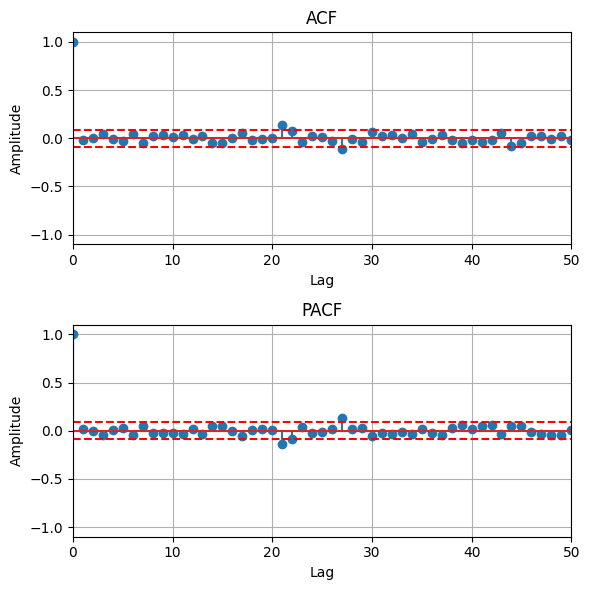

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 9.44 < 31.41)
  McLeod-Li test:        True (white if 23.51 < 31.41)
  Monti test:            True (white if 9.79 < 31.41)
  Sign change test:      True (white if 0.52 in [0.46,0.54])


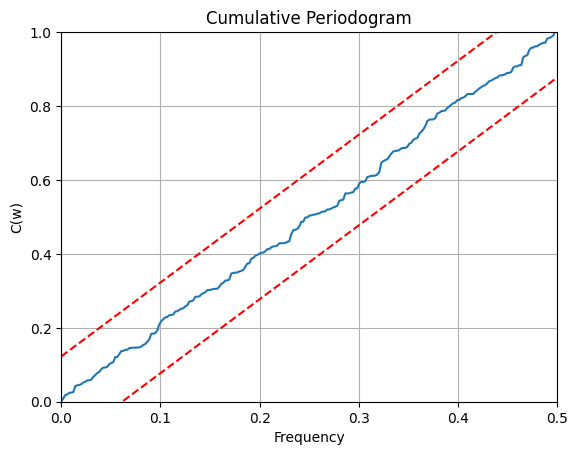

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


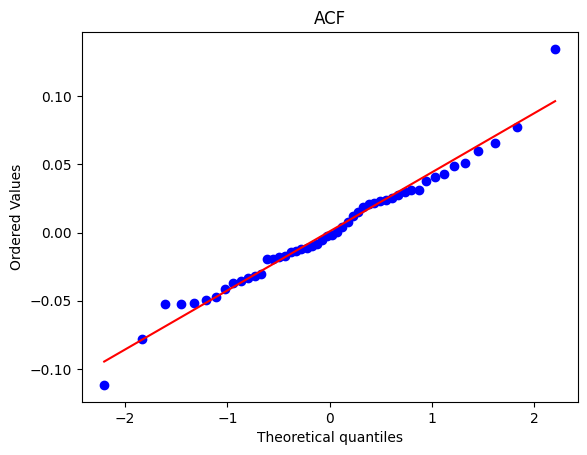

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


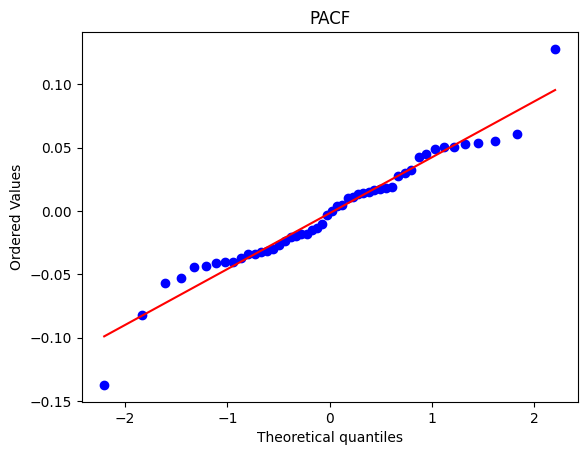

In [23]:
# Use PEM to re-estimate all parameters with the orders found
tork_A1 = 1
tork_A2 = r
tork_B = [0]*d + [1]*s # Not sure about this
tork_C = 2
final_model = modelling.PEM( y=y,x=x,A=0,B=B,F=A2, C=C, D=A1)
final_model.set_free_params(B_free=B)
final_model_fitted = final_model.fit(method='LS', bh=False)
final_model_fitted.summary()
final_resid = final_model_fitted.resid
final_acf_est, final_pacf_est = analysis.plotACFnPACF(final_resid,noLags=50,titleStr=None, return_val=True)
tests.whiteness_test(final_resid)
checkNormal(final_acf_est, remove=1, title='ACF')
checkNormal(final_pacf_est, remove=1, title='PACF')

The residuals here are reasonably white, the parameters are significantly greater than 0 as 0 is not in any of the confidence intervals.